In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import sklearn as skl

# Demostración

Dada la siguiente función de coste vamos a determinar su derivada para poder emplear el método de gradiente descendiente para minimizar la función de coste.
\begin{equation}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{i}log(h_{\theta}(X^{i}))-(1-y^{i})log(1-h_{\theta}(X^{i}))]
\end{equation}

\begin{equation}
\frac{\partial J}{\partial \theta_{k}}= \frac{1}{m}\sum_{i=1}^{m}\left[\frac{-y^{i}}{h_{\theta}(X^{i})}\frac{dh_{\theta}(X^{i})}{d\theta_{k}}-\left(\frac{1-y^{i}}{1-h_{ \theta}(X^{i})      }\right)\left(-\frac{dh_{\theta}(X^{i})}{d\theta_{k}}\right)

\right]
\end{equation}

\begin{equation}
\frac{\partial J}{\partial \theta_{k}}= \frac{1}{m}\sum_{i=1}^{m}\left[\left(\frac{dh_{\theta}(X^{i})}{d\theta_{k}}\right) \left(  \frac{-y^{i}}{h_{\theta}(X^{i})}+\frac{1-y^{i}}{1-h_{ \theta}(X^{i})      } \right)

\right]
\end{equation}


\begin{equation}
\frac{\partial J}{\partial \theta_{k}}= \frac{1}{m}\sum_{i=1}^{m}\left[\left(\frac{dh_{\theta}(X^{i})}{d\theta_{k}}\right) \left( \frac{h_{\theta}(X^{i})-y^{i}}{h_{\theta}(X^{i})(1-h_{\theta}(X^{i}))}\right)

\right]
\end{equation}

Aquí se debe mencionar que:

\begin{equation}
h_{\theta}(X^{i})=\frac{1}{1+e^{\Theta^{T}X^{i}}}
\end{equation}

Donde $\Theta^{T}$ es una matriz de tamaño $1\times (n+1)$ y^{i} $X$ es una matriz de tamaño $(n+1)\times(m)$, definidas como:

\begin{equation}
\Theta^{T}=
\begin{bmatrix}
1,&\theta_{1},&\theta_{2},&...&\theta_{n}
\end{bmatrix}
\end{equation}


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego, el producto $\Theta^{T}X^{i}$ se puede calcular como sigue:

\begin{equation}
\Theta^{T}X^{i}=\sum_{j=0}^{n}\theta_{j}x^{i}_{j}
\end{equation}

De donde se sigue finalmente que:

\begin{equation}
\frac{d h_{\theta}(X^{i})}{d\theta_{k}}=\frac{-1}{(1+e^{\Theta^{T}X^{i}})^{2}}(e^{\Theta^{T}X^{i}})\frac{d\Theta^{T}X^{i}}{d\theta_{k}}
\end{equation}

Notando que: $\frac{d\Theta^{T}X^{i}}{d\theta_{k}}=\sum_{j=0}^{n}\frac{d\theta_{j}}{d\theta_{k}}x_{j}^{i}=\sum_{j=0}^{n}\delta_{jk}x_{j}^{i}=x_{k}^{i}$, y $\frac{1}{(1+e^{\Theta^{T}X^{i}})^{2}}=h_{\theta}(X^{i})^{2}$, podemos reescribir la anterior ecuación como:

\begin{equation}
\frac{d h_{\theta}(X^{i})}{d\theta_{k}}=-(h_{\theta}(X^{i}))^{2}(e^{\Theta^{T}X})x_{k}^{i}
\end{equation}

Finalmente, también se puede notar que $e^{\Theta^{T}X^{i}}=\frac{1-h_{\theta}(X^{i})}{h_{\theta}(X^{i})}$, entonces la anterior ecuación se convierte en

\begin{equation}
\frac{d h_{\theta}(X^{i})}{d\theta_{k}}=-h_{\theta}(X^{i})(1-h_{\theta}(X^{i}))x_{k}^{i}
\end{equation}

Así, la derivada parcial de la función de coste sería:

\begin{equation}
\frac{\partial J}{\partial \theta_{k}}= \frac{1}{m}\sum_{i=1}^{m}\left[-h_{\theta}(X^{i})(1-h_{\theta}(X^{i}))x_{k}^{i} \left( \frac{h_{\theta}(X^{i})-y^{i}}{h_{\theta}(X^{i})(1-h_{\theta}(X^{i}))}\right)

\right]
\end{equation}

De donde:

\begin{equation}
\frac{\partial J}{\partial \theta_{k}}= \frac{1}{m}\sum_{i=1}^{m}\left[y^{i}-h_{\theta}(X^{i})

\right]x_{k}^{i}
\end{equation}

In [2]:
## Importación del dataset iris
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit ### Modelo de selección de la libería sklearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()


# Clasificación
Plantas de la especie setosa le corresponde la clase 0, de la especie versicolor le corresponde la clase 1, y de la especie virginica le corresponde la clase 2

In [3]:
### Claves del diccionario

iris.keys()
names = iris['target_names'] ## Nombres de las especies

# ==== Posición de cada planta ==== #
setosa = iris["target"][iris["target"]==0]
versicolor = iris["target"][iris["target"] == 1]
virginica = iris["target"][iris["target"] == 2]

# ==== Datos del dataset ==== #

X = iris["data"]
Y = iris["target"]

# ==== Nombres de las caracteristica de cada columna de datos ==== #

names_features = iris["feature_names"]

# ==== Creación del DataFrame ==== #

df = pd.DataFrame(X,columns=names_features)

In [4]:
# Renombre del dataFrame 

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]
df.columns=cols

# ==== Agregando la clasificación de cada especie de plantas ==== #
df["Target"]=Y 

In [5]:
## Partición del conjunto en datos de entramiento y datos de prueba

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

# ==== Asignación del DataFrame de entraniemto y prueba ==== #

df_train = strat_test_set 
df_test = strat_train_set


# Clasificación tipo 1: Setosa

In [6]:
# Valores de entrenamiento 

# Reconocimiento de la planta setosa a partir del tamaño del Sepal

y_train = ( df_train["Target"] == 0 ).astype(float)

X_train = df_train.iloc[:,0:1].values # Sepallength_cm


# Datos de prueba para la misma caracteristica de esa planta
y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

In [7]:
# Modelo empleado para el entramiento del modelo de clasificación 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train) ## Aprendizaje de la caracteristica y el tipo de dato

LogisticRegression()

In [8]:
## Veamos la medida de la predicción de los datos
print(log_reg.score(X_test,y_test))

0.9166666666666666


Se obtuvo 0.92 de la anterior predicción, indicando que hay una buena predicción del modelo

In [9]:
# Determinación de la frontera
X_new = np.linspace(0,10,1000).reshape(-1,1) # Valores posibles de la longitud del sepal
prob = log_reg.predict_proba(X_new) # Veamos en base de estos datos la probabilidad que sea una planta setosa

# Para el modelo de regresión logitstica, si la probabilidad es mayor a 0.5, entonces es una setosa.
decision_boundary = X_new[prob[:,0] >=0.5]

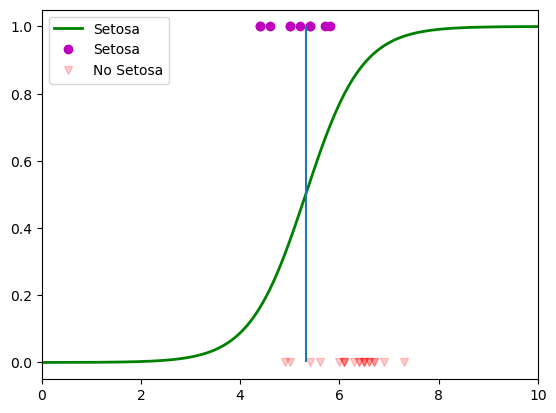

In [10]:
# Visualización de la clasificación

plt.figure()
# Regresión logistica
plt.plot(X_new, prob[:,0],"g-", linewidth = 2, label = "Setosa"  )
plt.xlim(0,10)

plt.plot(X_train[y_train == 1], y_train[y_train == 1],"mo",label = "Setosa")
plt.plot(X_train[y_train == 0], y_train[y_train == 0],"rv", alpha = 0.2,label = "No Setosa")
plt.legend()
plt.vlines(decision_boundary[0],0,1)
plt.show()

# Frontera de desición



In [11]:
print("Clases aprendidas por el modelo:", log_reg.classes_)

Clases aprendidas por el modelo: [0. 1.]


# Preguntas: 

¿Qué significa la anterior curva de regresión logistica? 
¿No estaría errada aquella clasificación, considerando que clasifica mayormente terminos mayores a 0.5 como setosa, cuando realmente aquella longitudes no corresponde a setosa? 
¿Qué hace la regresión logistica de sklearn? 
¿Como optimiza aquellos parametros? 


# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

# Solución 
Primero se va a programar un multiclasificador con la primera caracteristica, luego al modelo se le iran agregando caracteristicas.

## Clasificación 2. Versicolor

In [12]:
# Valores de entrenamiento 

# Reconocimiento de la planta setosa a partir del tamaño del Sepal

y_train_1 = ( df_train["Target"] == 1 ).astype(float)

y_train_1_ = (df["Target"] == 1 ).astype(float)

X_train_1 = df_train.iloc[:,0:1].values # Sepallength_cm
X_train_1_ = df["SepalLength_cm"].values.reshape(-1,1)


# Datos de prueba para la misma caracteristica de esa planta
y_test_1 = (df_test['Target'] == 1).astype(float)
X_test_1 = df_test.iloc[:,0:1].values

In [13]:
log_reg1 = LogisticRegression()
log_reg1_ = LogisticRegression()
log_reg1.fit(X_train_1,y_train_1)
log_reg1_.fit(X_train_1_,y_train_1_)

LogisticRegression()

In [14]:
# Determinación de la frontera
X_new_1 = np.linspace(0,10,1000).reshape(-1,1) # Valores posibles de la longitud del sepal
prob_1 = log_reg1.predict_proba(X_new_1) # Veamos en base de estos datos la probabilidad que sea una planta setosa
prob_1_ = log_reg1_.predict_proba(X_new_1)
# Para el modelo de regresión logitstica, si la probabilidad es mayor a 0.5, entonces es una setosa.
decision_boundary_1 = X_new_1[prob_1[:,1] >=0.5]

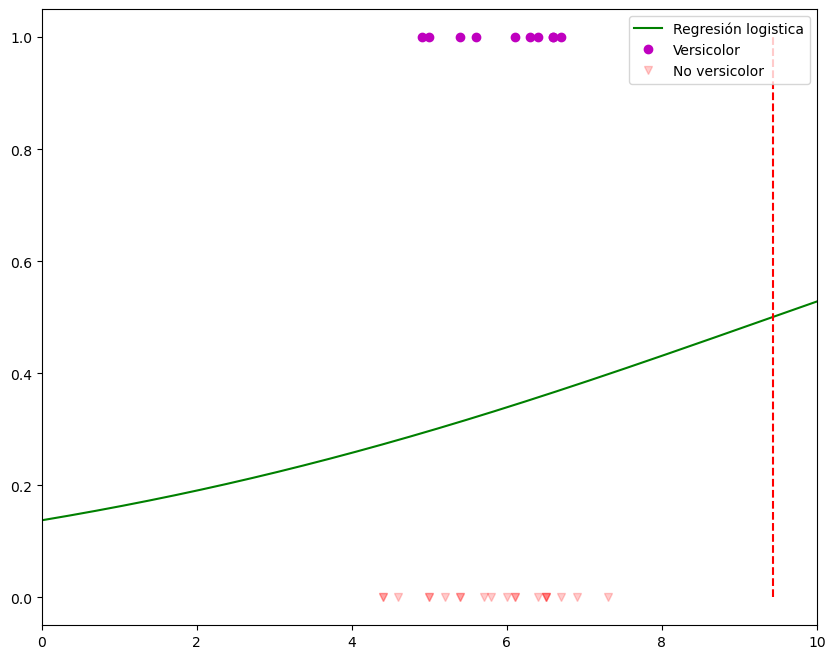

In [15]:
plt.figure(figsize = (10,8))
#plt.plot(X_new_1,prob_1[:,1], color = "green", label = "Regresión logistica")
plt.plot(X_new_1,prob_1_[:,1], color = "green", ls = "-",label = "Regresión logistica")
plt.vlines(X_new_1[prob_1_[:,1]>=0.5][0],0,1, color = "red",ls = "--")
plt.plot(X_train_1[y_train_1 == 1], y_train_1[y_train_1 == 1],"mo",label = "Versicolor")
plt.xlim(0,10)
plt.plot(X_train_1[y_train_1 == 0], y_train_1[y_train_1 == 0],"rv", alpha = 0.2,label = "No versicolor")
plt.legend()

# Clasificación 3. Virginica

In [16]:
## Datos de entranmiento
X_train_2 = df_train["SepalLength_cm"].values.reshape(-1,1)
X_train_2_ = df["SepalLength_cm"].values.reshape(-1,1)
Y_train_2 = (df_train["Target"] == 2).astype(float)
Y_train_2_ = (df["Target"]==2).astype(float)

## Datos de prueba. 

X_test_2 = df_test["SepalLength_cm"].values.reshape(-1,1)
Y_test_2 = (df_test["Target"]==2).astype(float)

In [17]:
## Modelo de entramiento 

log_reg3 = LogisticRegression(solver = "liblinear",random_state=42)
log_reg3_ = LogisticRegression(solver = "liblinear",random_state=42)
log_reg3.fit(X_train_2,Y_train_2)
log_reg3_.fit(X_train_2_,Y_train_2_)

LogisticRegression(random_state=42, solver='liblinear')

In [18]:
## Prueba del modelo con datos aleatorios. 

X_new_2 = np.linspace(0,15,1000).reshape(-1,1)
y_new_2 = log_reg3.predict_proba(X_new_2)
y_2 = log_reg3_.predict_proba(X_new_2)

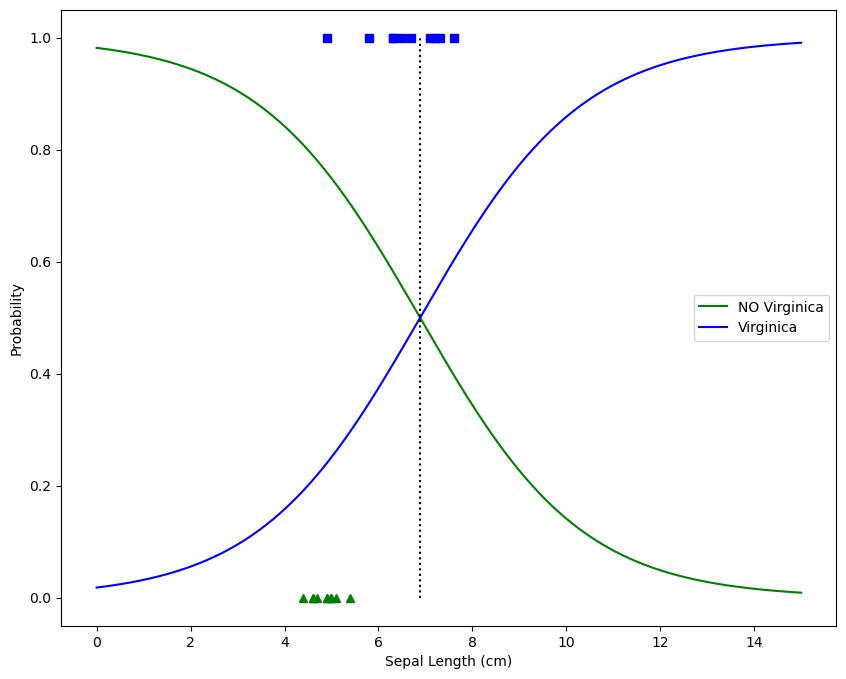

In [19]:
#plt.plot(X_new_2,y_new_2[:,0],"g-", label = "No virginica")
#plt.plot(X_new_2,y_new_2[:,1],"b-", label = "Virginica")
plt.figure(figsize=(10,8))
plt.plot(X_new_2,y_2[:,0],"g-", label = "NO Virginica")
plt.plot(X_new_2,y_2[:,1],"b-", label = "Virginica")
plt.plot(X_train_2_[Y_train_2_ == 1][:10],Y_train_2_[Y_train_2_ == 1][:10],"bs")
plt.plot(X_train_2_[Y_train_2_ == 0][:10],Y_train_2_[Y_train_2_ == 0][:10],"g^")
plt.ylabel("Probability")
plt.vlines(X_new_2[ y_2[:,1] >= 0.5 ][0],0,1,color = "black",ls = "dotted")
plt.xlabel("Sepal Length (cm)")
plt.legend()
plt.show()

In [20]:
X = df["PetalWidth_cm"].values.reshape(-1,1)
Y = (df["Target"] == 2).astype(float)

## Ensayo con la partición del conjunto de datos, tomando muestras representativas


X_ = df_train["PetalWidth_cm"].values.reshape(-1,1)
Y_ = (df_train["Target"] == 2).astype(float)

X_2 = df_test["PetalWidth_cm"].values.reshape(-1,1)
Y_2 = (df_test["Target"] == 2).astype(float)


In [21]:
log_reg_3 = LogisticRegression(solver = "liblinear", random_state = 42)
log_reg_4 = LogisticRegression(solver = "liblinear", random_state = 42)
log_reg_4.fit(X_,Y_)
log_reg_3.fit(X,Y)

LogisticRegression(random_state=42, solver='liblinear')

In [22]:
log_reg_4.score(df_test["PetalWidth_cm"].values.reshape(-1,1),Y_test_2)

0.9583333333333334

In [23]:
X_new_3 = np.linspace(0,3,1000).reshape(-1,1)
prob_3 = log_reg_3.predict_proba(X_new_3)
prob_4 = log_reg_4.predict_proba(X_new_3)

decision_boundary_2 = X_new_3[prob_3[:,1] >= 0.5][0]
decision_boundary_4 = X_new_3[prob_4[:,1] >= 0.5][0]

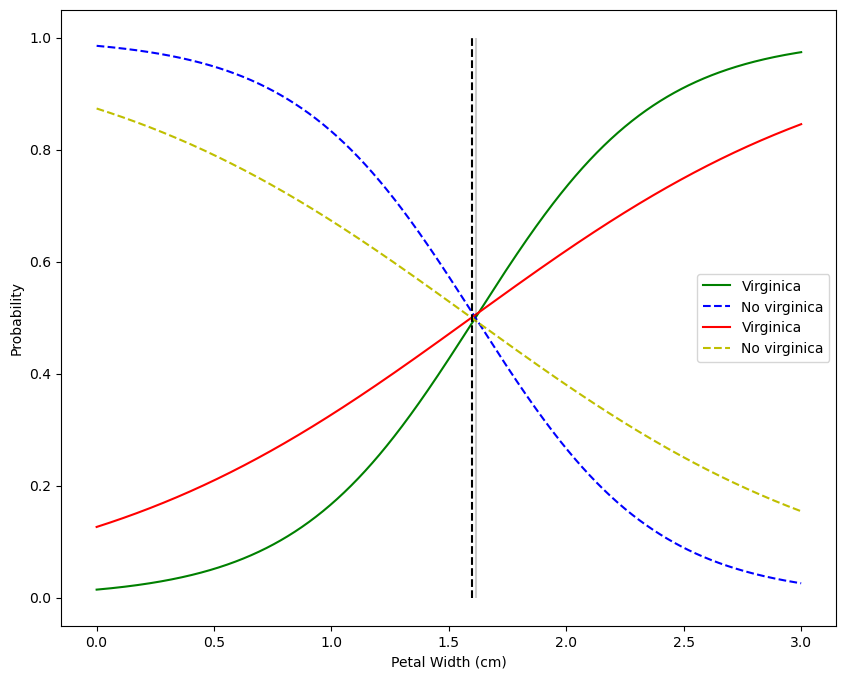

In [24]:
plt.figure(figsize = (10,8))
plt.plot(X_new_3,prob_3[:,1],"g-",label = "Virginica")
plt.plot(X_new_3,prob_3[:,0],"b--",label = "No virginica")
plt.plot(X_new_3,prob_4[:,1],"r-",label = "Virginica")
plt.plot(X_new_3,prob_4[:,0],"y--",label = "No virginica")
plt.vlines(decision_boundary_2,0,1, color = "black", ls = "-", alpha = 0.2)
plt.vlines(decision_boundary_4,0,1,color = "black", ls = "--")
plt.ylabel("Probability")
plt.xlabel("Petal Width (cm)")
plt.legend()
plt.show()

Esta anterior grafica demuestra que la curva predicha por aquel DataFrame partido en datos de entramiento y de prueba es ineficiente, dado que el DataFrame no es lo suficientemente grande como para que valga la pena. A partir de aquí en adelante se empleará el conjunto de datos completos y se entrenará para todas las caracteristicas. 

In [25]:
def multi_class(x):
    # La función recibe el valor entero a analziar
    x = np.array(x).reshape(-1,1)
    
    prob_setosa = log_reg.predict_proba(x)[0][1]
    prob_versicolor = log_reg1_.predict_proba(x)[0][1]
    prob_virginica = log_reg3_.predict_proba(x)[0][1]
    lista = np.array([prob_setosa,prob_versicolor,prob_virginica])
    maximo = np.max(lista)
    pos = np.where(lista == maximo)[0][0]

    if pos == 0:
        msg = "La planta es de tipo Setosa"
        return msg
    elif pos == 1:
        msg = "La planta es de tipo Versicolor"
        return msg
    else:
        msg = "La planta es de tipo Virginica"
        return msg
    

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

In [26]:
### Vamos a entrenar los modelos con todas las caracteristicas disponibles. 

X1 = df.iloc[:,0:4].values
Y1 = (df["Target"] == 0).astype(float)
Y2 = (df["Target"] == 1).astype(float)
Y3 = (df["Target"] == 2).astype(float)

### Modelos de regresión logistica. 

mod1 = LogisticRegression(solver = "liblinear",C = 10**10 ,random_state=42)
mod2 = LogisticRegression(solver = "liblinear",C = 10**10, random_state=42)
mod3 = LogisticRegression(solver = "liblinear",C = 10**10, random_state=42)

### Aplicación del modelo 

mod1.fit(X1,Y1)
mod2.fit(X1,Y2)
mod3.fit(X1,Y3)


LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

In [27]:
## Creación de la malla de datos

x0,x1,x2,x3 = np.meshgrid(
    np.linspace(2.3,9.9,50).reshape(-1,1),
    np.linspace(0,6.4,50).reshape(-1,1),
    np.linspace(0,8.9,50).reshape(-1,1),
    np.linspace(0,4.5,50).reshape(-1,1)
)

## Creación de los datos a probar

Xnew = np.c_[x0.ravel(),x1.ravel(),x2.ravel(),x3.ravel()]

##=== Setosa ===#
y_setosa = mod1.predict_proba(Xnew)

zz_setosa = y_setosa[:,1].reshape(x0.shape)

##=== Versicolor === #
y_versiclor = mod2.predict_proba(Xnew)

##=== Virginica === #
y_virginica = mod3.predict_proba(Xnew)

In [49]:
def multi_class2(x):
    # La función recibe una lista con los valores a probar
    x = np.array(x).reshape(1,4)
    
    prob_setosa = mod1.predict_proba(x)[0][1]
    prob_versicolor = mod2.predict_proba(x)[0][1]
    prob_virginica = mod3.predict_proba(x)[0][1]
    lista = np.array([prob_setosa,prob_versicolor,prob_virginica])
    maximo = np.max(lista)
    pos = np.where(lista == maximo)[0][0]

    if pos == 0:
        msg = "La planta es de tipo Setosa"
        return msg
    elif pos == 1:
        msg = "La planta es de tipo Versicolor"
        return msg
    else:
        msg = "La planta es de tipo Virginica"
        return msg

In [47]:
## Modelo de clasificación con todos las caracteristicas
X = [4.9,5.0, 1.8, 0.3]
multi_class2(X)

'La planta es de tipo Setosa'

Ahora, se empleará un softmax regresion para determinar lo anterior pero no de forman tan "artesanal", además de que nos permitirá poder tener una idea de como es las regiones de decisión para cada planta. 
Finalmente se emplearan dos metricas para evaluar los respectivos resultados, estás metricas serian la matriz de confusión y la curva ROC.

El anterior multiclasificador teniendo en cuenta todas las caracteristicas no tiene una visualización, para ello se empleara para el entrenamiento unicamente dos caracteristicas, exactamente (siguiendo la sugerencia del libro) el tamaño y la longitud del petalo. 

In [84]:
Y_ = df["Target"].values
X_1 = df.iloc[:,2:4].values

In [85]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",C = 10, random_state = 42)
# Entrenamiento del softmax
softmax_reg.fit(X_1,Y_)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [96]:
## Creacion de malla de puntos
x0_ , x1_ = np.meshgrid(
    np.linspace(0,8,500).reshape(-1,1),
    np.linspace(0,3.5,200).reshape(-1,1)
)

### Puntos de prueba

X_new_ = np.c_[x0_.ravel(),x1_.ravel()]

### Predicción de la probabilidad
Proba = softmax_reg.predict_proba(X_new_)
## Predicción de que clase pertenece cada valor
Prediccion = softmax_reg.predict(X_new_)
## Organizando en una malla aquellas probabilidades que sea alguna de las clases 0,1,2

zz1 = Proba[:,1].reshape(x0_.shape)
zz = Prediccion.reshape(x0_.shape)
## Para predecir los tipos de valores. 


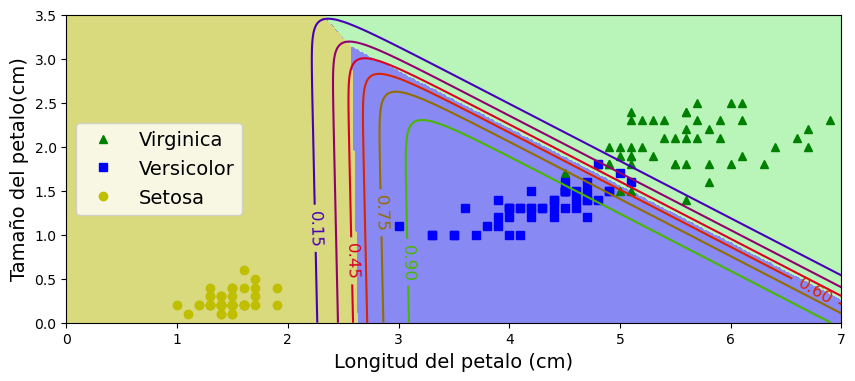

In [106]:


plt.figure(figsize = (10,4))
## Grafica de los puntos que se obtiene cada caracteristica
## Aquí estamos delimitando cada categoría y los posibles valores en el data Frame
plt.plot(X_1[Y_ == 2,0], X_1[Y_ == 2,1],"g^", label = "Virginica")
plt.plot(X_1[Y_ == 1,0],X_1[Y_==1,1], "bs",label = "Versicolor")
plt.plot(X_1[Y_ == 0,0],X_1[Y_==0,1],"yo",label = "Setosa")

### Vamos a graficar un contorno con distinto colores

from matplotlib.colors import ListedColormap
## Esto es para que contraste los puntos, y aquí se emplea colores RGB
c_cmap = ListedColormap(["#d9d97d","#8989f4","#b9f5b9"])
## Contorno de la predicción de cada valor obtenido
plt.contourf(x0_,x1_,zz, cmap = c_cmap)
## Guardando la figura con la probabilidad
contorno = plt.contour(x0_,x1_,zz1, cmap = plt.cm.brg)
### Estos son la partición de cada caracteristica
### Curvas de nivel por así decirlo
plt.clabel(contorno,inline = 1, fontsize = 12)
plt.xlabel("Longitud del petalo (cm)", fontsize = 14)
plt.ylabel("Tamaño del petalo(cm)", fontsize = 14)
plt.legend(loc = "center left", fontsize = 14)
plt.axis([0,7,0,3.5])
plt.show()